# Sentiment Analysis
## By Alejandro Gomez Orjuela and Melanie Giraldo C.

## Introduction

#### Sentiment analysis is a popular technique used to determine the emotional tone behind a body of text. It is widely applied to social media posts to analyze public opinions on various topics. This project will focus on performing sentiment analysis on social media data, such as tweets, to classify posts as positive, negative, or neutral.

## Objective 

#### To apply sentiment analysis techniques on a dataset of social media posts, categorizing them into positive, negative, and neutral sentiments, and providing insights into public opinion on a particular topic.


## 1.Import libraries

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

## 2.Import Datasheet

In [2]:
data = []
with open("data/social_media_posts.txt", "r") as file:
    for line in file:
        parts = line.strip().split(",", 2)
        if len(parts) == 3:
            data.append(parts)
df = pd.DataFrame(data, columns=["post_id", "username", "post_text"])
print(df.head())

  post_id username                                          post_text
0       1    user1   I absolutely love the new design of the website!
1       2    user2  Terrible service at the restaurant today. Neve...
2       3    user3         Feeling happy and blessed today! #grateful
3       4    user4  Canâ€™t believe my team lost again... #frustrated
4       5    user5  Just got a new job! So excited to start this n...


## 3.Text Processing

In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

df['cleaned_text'] = df['post_text'].apply(clean_text)

stop_words = set(stopwords.words('english'))
df['tokenized'] = df['cleaned_text'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

print(df[['post_text', 'cleaned_text', 'tokenized']].head())

                                           post_text  \
0   I absolutely love the new design of the website!   
1  Terrible service at the restaurant today. Neve...   
2         Feeling happy and blessed today! #grateful   
3  Canâ€™t believe my team lost again... #frustrated   
4  Just got a new job! So excited to start this n...   

                                        cleaned_text  \
0    i absolutely love the new design of the website   
1  terrible service at the restaurant today never...   
2           feeling happy and blessed today grateful   
3         cant believe my team lost again frustrated   
4  just got a new job so excited to start this ne...   

                                           tokenized  
0           [absolutely, love, new, design, website]  
1  [terrible, service, restaurant, today, never, ...  
2         [feeling, happy, blessed, today, grateful]  
3            [cant, believe, team, lost, frustrated]  
4  [got, new, job, excited, start, new, chapter, ..

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 4.Sentiment Distribution

                                                 cleaned_text  sentiment_label
timestamp                                                                     
2024-01-01    i absolutely love the new design of the website                1
2024-01-02  terrible service at the restaurant today never...               -1
2024-01-03           feeling happy and blessed today grateful                1
2024-01-04         cant believe my team lost again frustrated               -1
2024-01-05  just got a new job so excited to start this ne...                1


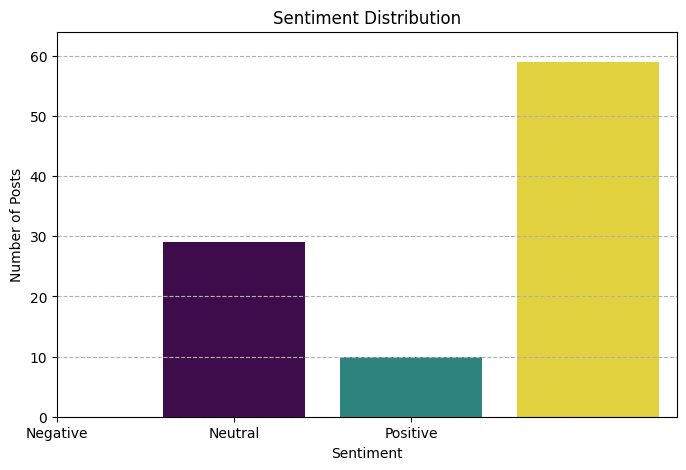

In [10]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] > 0:
        return 1  # positivo
    elif score['compound'] < 0:
        return -1  # negativo
    else:
        return 0  # neutral

df['sentiment_label'] = df['cleaned_text'].apply(get_sentiment)
print(df[['cleaned_text', 'sentiment_label']].head())

sentiment_counts = df['sentiment_label'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, palette='viridis', errorbar=None)
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.title("Sentiment Distribution")
plt.xticks(ticks=[-1, 0, 1], labels=["Negative", "Neutral", "Positive"])
plt.ylim(0, sentiment_counts.max() + 5)
plt.grid(axis='y', linestyle='--')
plt.legend([],[], frameon=False)
plt.show()


## 5.Word Frecuency Analysis

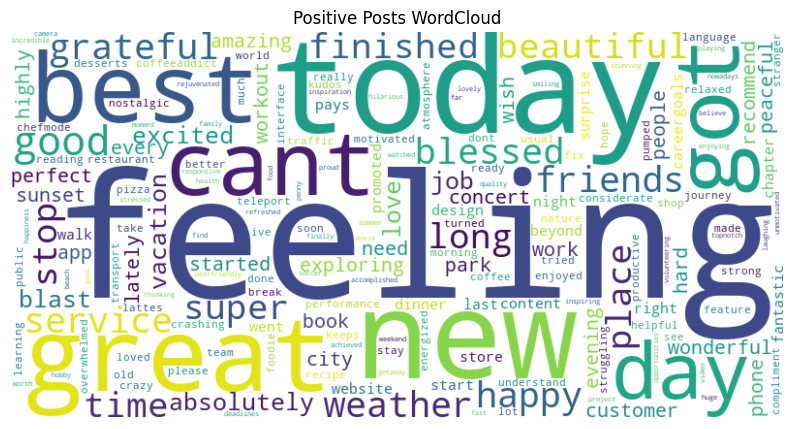

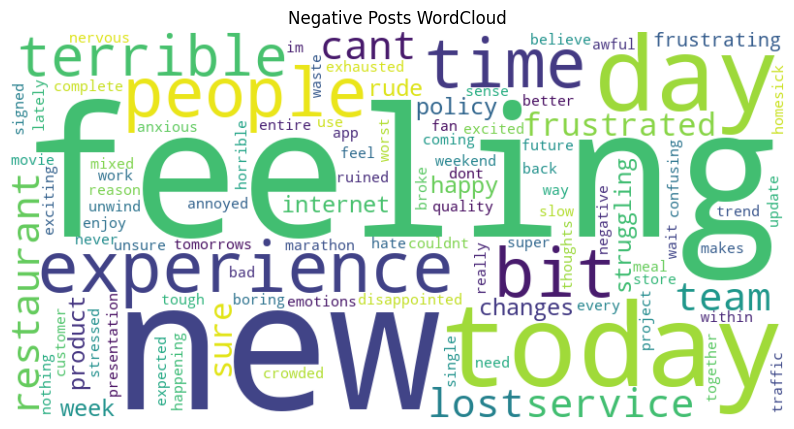

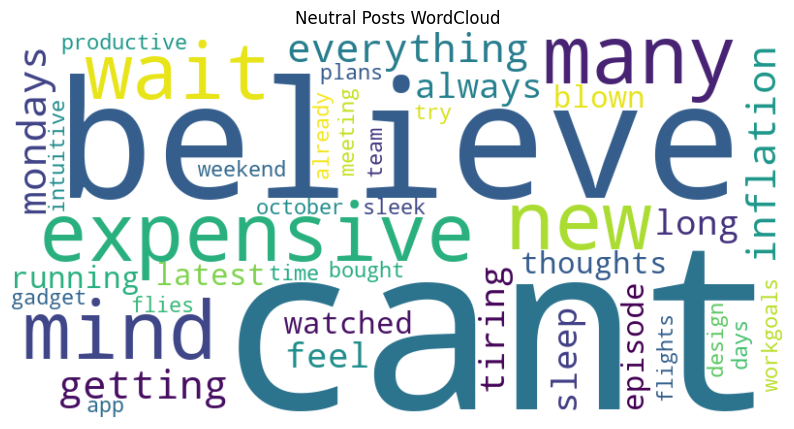

In [11]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

positive_words = df[df['sentiment_label'] == 1]['tokenized'].explode()
negative_words = df[df['sentiment_label'] == -1]['tokenized'].explode()
neutral_words = df[df['sentiment_label'] == 0]['tokenized'].explode()

generate_wordcloud(positive_words, "Positive Posts WordCloud")
generate_wordcloud(negative_words, "Negative Posts WordCloud")
generate_wordcloud(neutral_words, "Neutral Posts WordCloud")

## 6.Visualization and analysis 

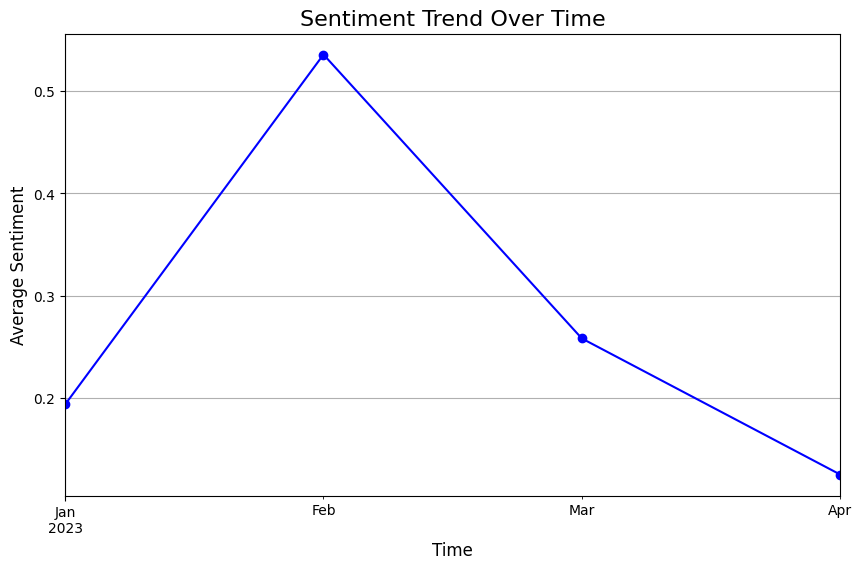

In [15]:
if 'timestamp' not in df.columns:
    df['timestamp'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

df['sentiment_label'] = df['sentiment_label'].astype(int)
sentiment_trend = df['sentiment_label'].resample('ME').mean()

plt.figure(figsize=(10, 6))
sentiment_trend.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title("Sentiment Trend Over Time", fontsize=16)
plt.ylabel("Average Sentiment", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.grid(True)
plt.show()

In [13]:
positive_count = df[df['sentiment_label'] == 1].shape[0]
negative_count = df[df['sentiment_label'] == -1].shape[0]
neutral_count = df[df['sentiment_label'] == 0].shape[0]

summary = {
    "Total Posts": len(df),
    "Positive Posts": positive_count,
    "Negative Posts": negative_count,
    "Neutral Posts": neutral_count,
    "Positive Ratio": positive_count / len(df),
    "Negative Ratio": negative_count / len(df),
    "Neutral Ratio": neutral_count / len(df),
}

print(summary)


{'Total Posts': 98, 'Positive Posts': 59, 'Negative Posts': 29, 'Neutral Posts': 10, 'Positive Ratio': 0.6020408163265306, 'Negative Ratio': 0.29591836734693877, 'Neutral Ratio': 0.10204081632653061}


## Conclusion

#### This project effectively categorized social media posts into positive, negative, and neutral sentiments using sentiment analysis tools. Text preprocessing and analysis with libraries like TextBlob and VADER revealed trends in public opinion. Visualizing the sentiment distribution and common words provided a clearer understanding of the emotions in the posts. Overall, the project highlighted how sentiment analysis can help track public opinion and its potential applications in various fields.